<a href="https://colab.research.google.com/github/taniokah/DL-Basic-Seminar/blob/master/Linear_Regression_with_Scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sickit-learn を使って線形回帰

以下の記事を参考に Scikit-learn を用いた線形回帰分析と、学習済みモデルを用いた推測を実験します。Bostonの不動産価格についてのデータを用います。

Scikit-learn で線形回帰  
https://qiita.com/0NE_shoT_/items/08376b08783cd554b02e


In [0]:
from sklearn.datasets import load_boston
boston = load_boston() # データセットの読み込み

import pandas as pd
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names) # 説明変数(boston.data)をDataFrameに保存
boston_df['MEDV'] = boston.target # 目的変数(boston.target)もDataFrameに追加


In [3]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


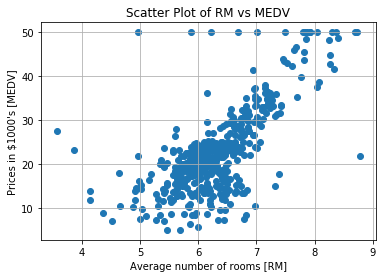

In [4]:
# 全データをグラフ表示

import matplotlib.pyplot as plt
plt.scatter(boston_df['RM'], boston_df['MEDV']) # 平均部屋数と住宅価格の散布図をプロット

plt.title('Scatter Plot of RM vs MEDV')    # 図のタイトル
plt.xlabel('Average number of rooms [RM]') # x軸のラベル
plt.ylabel('Prices in $1000\'s [MEDV]')    # y軸のラベル
plt.grid()                                 # グリッド線を表示

plt.show()                                 # 図の表示

In [5]:
boston_df[['RM','MEDV']].corr()

,RM,MEDV
RM,1.00000,0.69536
MEDV,0.69536,1.00000


In [6]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

X = boston_df[['RM']].values         # 説明変数（Numpyの配列）
Y = boston_df['MEDV'].values         # 目的変数（Numpyの配列）

lr.fit(X, Y)                         # 線形モデルの重みを学習

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
print('coefficient = ', lr.coef_[0]) # 説明変数の係数を出力
print('intercept = ', lr.intercept_) # 切片を出力

coefficient =  lr.coef_[0]
intercept =  lr.intercept_

coefficient =  9.10210898118031
intercept =  -34.67062077643857


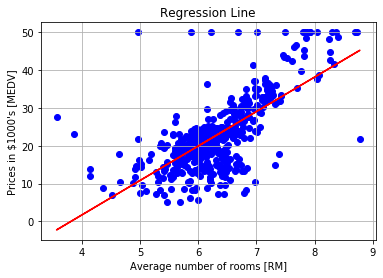

In [8]:
# 全データと回帰直線をグラフ表示

plt.scatter(X, Y, color = 'blue')         # 説明変数と目的変数のデータ点の散布図をプロット
plt.plot(X, lr.predict(X), color = 'red') # 回帰直線をプロット

plt.title('Regression Line')               # 図のタイトル
plt.xlabel('Average number of rooms [RM]') # x軸のラベル
plt.ylabel('Prices in $1000\'s [MEDV]')    # y軸のラベル
plt.grid()                                 # グリッド線を表示

plt.show()                                 # 図の表示

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, test_size = 0.3, random_state = 0) # データを学習用と検証用に分割

lr = LinearRegression()
lr.fit(X_train, Y_train) # 線形モデルの重みを学習


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

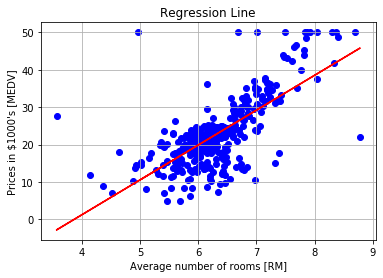

In [10]:
# 訓練データと回帰直線をグラフ表示

plt.scatter(X_train, Y_train, color = 'blue')         # 説明変数と目的変数のデータ点の散布図をプロット
plt.plot(X_train, lr.predict(X_train), color = 'red') # 回帰直線をプロット

plt.title('Regression Line')               # 図のタイトル
plt.xlabel('Average number of rooms [RM]') # x軸のラベル
plt.ylabel('Prices in $1000\'s [MEDV]')    # y軸のラベル
plt.grid()                                 # グリッド線を表示

plt.show()                                 # 図の表示

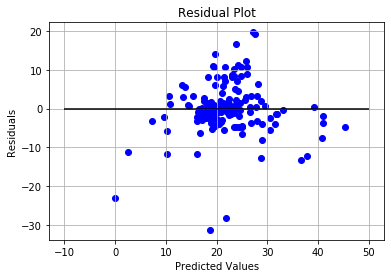

In [11]:
Y_pred = lr.predict(X_test) # 検証データを用いて目的変数を予測

plt.scatter(Y_pred, Y_pred - Y_test, color = 'blue')      # 残差をプロット 
plt.hlines(y = 0, xmin = -10, xmax = 50, color = 'black') # x軸に沿った直線をプロット
plt.title('Residual Plot')                                # 図のタイトル
plt.xlabel('Predicted Values')                            # x軸のラベル
plt.ylabel('Residuals')                                   # y軸のラベル
plt.grid()                                                # グリッド線を表示

plt.show()                                               # 図の表示

# 精度評価用の指標について

訓練データを用いて学習した学習モデルを使って実際にテストしてみたとき、どの程度の精度であるかを判定するための指標がいろいろあります。今回は、MSE と R^2 を紹介してあります。

下記 MSE と R^2 を含む説明が見つかりましたので、メモしておきます。

scikit-learn で回帰モデルの結果を評価する  
https://pythondatascience.plavox.info/scikit-learn/%E5%9B%9E%E5%B8%B0%E3%83%A2%E3%83%87%E3%83%AB%E3%81%AE%E8%A9%95%E4%BE%A1



In [16]:
from sklearn.metrics import mean_squared_error

Y_train_pred = lr.predict(X_train) # 学習データに対する目的変数を予測

# 訓練データを用いて評価した場合は、通常はテストデータで評価した場合よりも高い精度になります。

print('MSE train data: ', mean_squared_error(Y_train, Y_train_pred)) # 学習データを用いたときの平均二乗誤差を出力、小さいはず
print('MSE test data: ', mean_squared_error(Y_test, Y_pred))         # 検証データ、大きいはず


MSE train data:  42.15765086312224
MSE test data:  47.03304747975518


In [17]:
from sklearn.metrics import r2_score

# 誤差(エラー率)である MSE では、訓練データでのテストは小さい値、正解率(あてはまり)である R^2 は、大きい値になります。

print('r^2 train data: ', r2_score(Y_train, Y_train_pred))    # 大きいはず
print('r^2 test data: ', r2_score(Y_test, Y_pred))    # 小さいはず

r^2 train data:  0.5026497630040827
r^2 test data:  0.43514364832115193


# 重回帰分析をやってみる

RM に加えて、DIS も利用して学習してみます。

In [39]:
from sklearn.model_selection import train_test_split

X = boston_df[['RM', 'DIS']].values       # 説明変数
Y = boston_df['MEDV'].values         # 目的変数

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, test_size = 0.3, random_state = 0) # データを学習用と検証用に分割

lr = LinearRegression()
lr.fit(X_train, Y_train) # 線形モデルの重みを学習


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
print('coefficient = ', lr.coef_[0]) # 説明変数の係数を出力
print('coefficient = ', lr.coef_[1]) # 説明変数の係数を出力
print('intercept = ', lr.intercept_) # 切片を出力

coefficient0 =  lr.coef_[0]
coefficient1 =  lr.coef_[1]
intercept =  lr.intercept_

coefficient =  9.023216413573369
coefficient =  0.5320405592806157
intercept =  -36.17859845830708


In [41]:
Y_pred = lr.predict(X_test) # 検証データを用いて目的変数を予測
Y_train_pred = lr.predict(X_train) # 学習データに対する目的変数を予測

# 訓練データを用いて評価した場合は、通常はテストデータで評価した場合よりも高い精度になります。

print('MSE train data: ', mean_squared_error(Y_train, Y_train_pred)) # 学習データを用いたときの平均二乗誤差を出力、小さいはず
print('MSE test data: ', mean_squared_error(Y_test, Y_pred))         # 検証データ、大きいはず

print('r^2 train data: ', r2_score(Y_train, Y_train_pred))    # 大きいはず
print('r^2 test data: ', r2_score(Y_test, Y_pred))    # 小さいはず

MSE train data:  40.99168636673498
MSE test data:  46.432636201793585
r^2 train data:  0.5164051005699691
r^2 test data:  0.4423544531094703
